In [1]:
#import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


In [2]:
#import dataset
boston_df = pd.read_csv('boston.csv')
x=boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']].values
y=boston_df[['PRICE']].values

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Exploratory Data Analysis

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
#Pandas dataframe.isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values
boston_df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

In [6]:
#find correlation function
corr_boston=boston_df.corr()

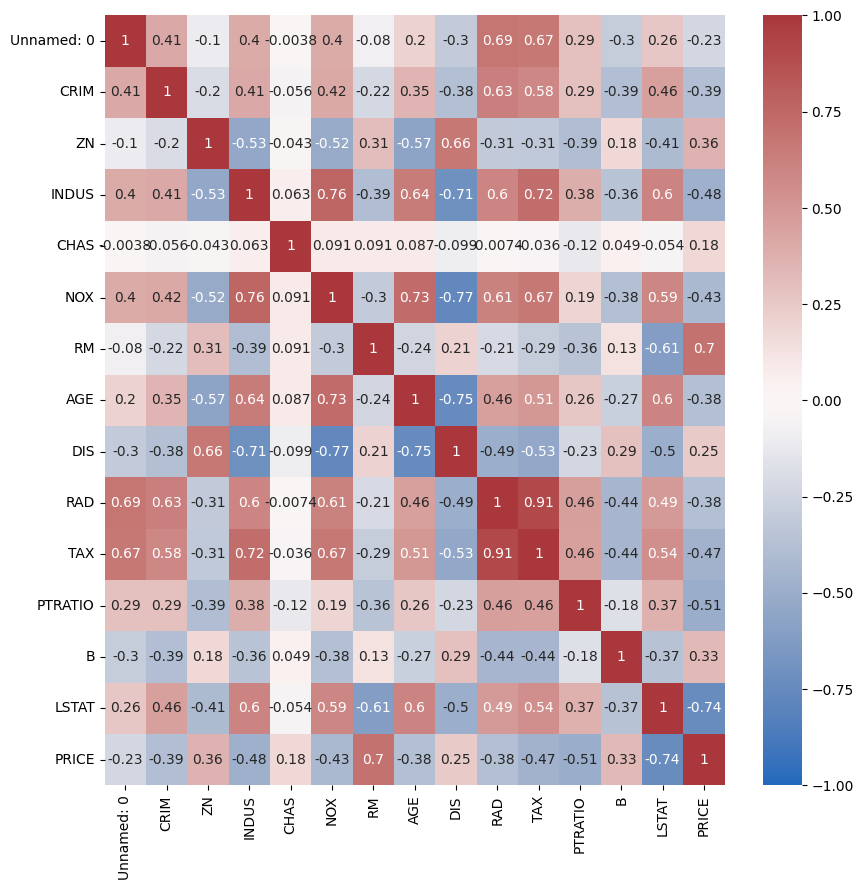

In [7]:
#make a heatmap of correlation coefficeint 
#Heatmap is data visulation by red and blue coor
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_boston, vmin=-1 ,vmax= 1,center=0, annot =True,cmap='vlag')
plt.show()

In [8]:
abs(corr_boston.PRICE)>0.5

Unnamed: 0    False
CRIM          False
ZN            False
INDUS         False
CHAS          False
NOX           False
RM             True
AGE           False
DIS           False
RAD           False
TAX           False
PTRATIO        True
B             False
LSTAT          True
PRICE          True
Name: PRICE, dtype: bool

In [9]:
print(boston_df.corr().abs().nlargest(3,'PRICE').index)

Index(['PRICE', 'LSTAT', 'RM'], dtype='object')


The top predictive variables to predict MEDV are LTSAT and RM which are the percentage of lower status and number of rooms respectively 

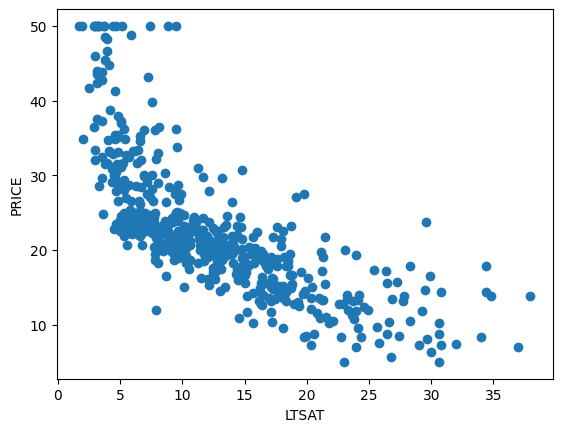

In [10]:
#visulazaton variable as a scatterplot
plt.scatter(x=boston_df['LSTAT'],y=boston_df['PRICE'])
plt.xlabel('LTSAT')
plt.ylabel('PRICE')
plt.show()


THE graph is neagtive association one value increase other decrease
IT means that when increase in poor population price of house will decrease
LTSAT = % of lower socio economic status


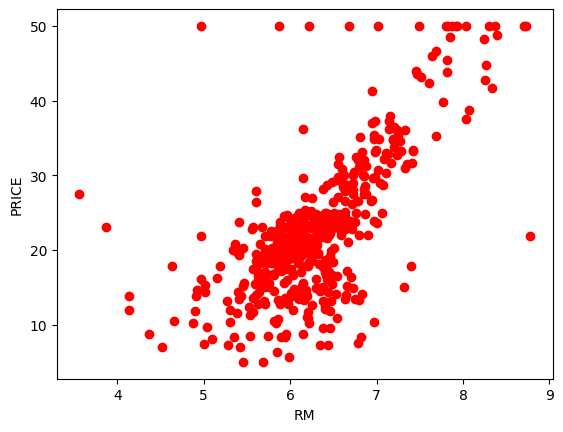

In [11]:
plt.scatter(x=boston_df['RM'],y=boston_df['PRICE'],marker='o',c='Red')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()



POSITIVE ASSOCIATION
RM = average no of room  per dwelling(ghar)
PRICE = MEDIAN VALUE OF PRICE
People buy house where more no of room present in house it means increase in rooms in house price will also increase.




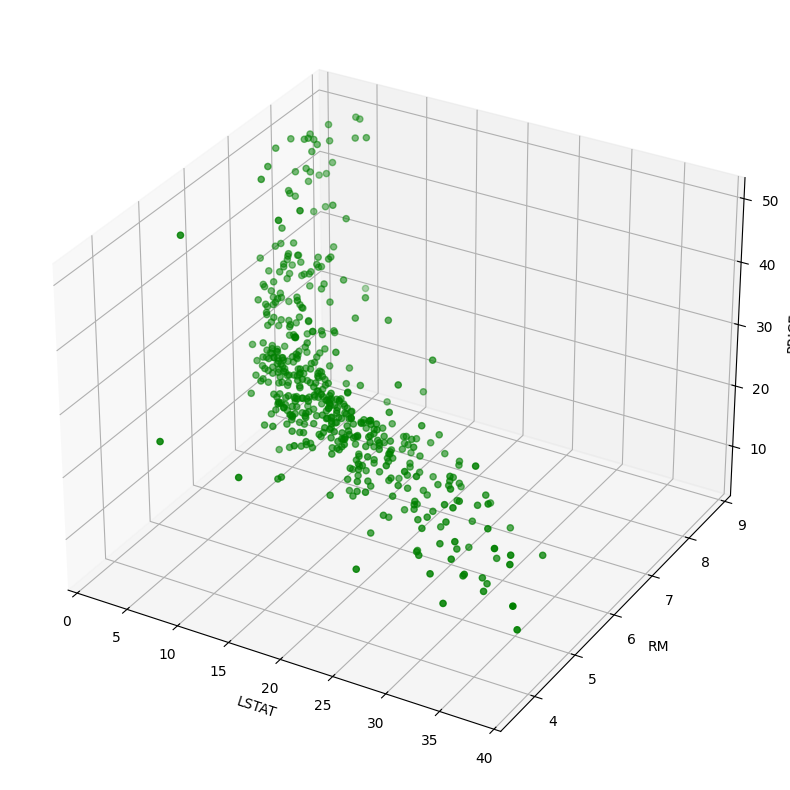

In [12]:
#make a 3D scatter plot 
from mpl_toolkits.mplot3d import Axes3D
fig =plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(boston_df['LSTAT'],boston_df['RM'],boston_df['PRICE'],c='green')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('PRICE')
plt.show()

Train the Model

In [13]:
#define the feature - LSTAT AND RM
X=pd.DataFrame(np.c_[boston_df['LSTAT'],boston_df['RM']])
X.columns=['LSTAT','RM'] 
print(X.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147


In [14]:
#define the target - PRICE
Y=boston_df['PRICE']

print(Y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [15]:
#Create training and task data
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test =train_test_split(X, Y, test_size =0.25 ,random_state =5)

In [16]:
print(X_train.shape)
print(Y_train.shape)

(379, 2)
(379,)


In [17]:
#  Recheck value is right total  training dataset =507 and we split our dataset into 75 ratio 25
507*0.75

380.25

In [18]:
print(X_test.shape)
print(Y_test.shape)

(127, 2)
(127,)


In [19]:
#  Recheck value is right total  Test dataset =507 and we split our dataset into 75 ratio 25
507*0.25

126.75

In [20]:
#create model
from sklearn.linear_model import LinearRegression
housing_model = LinearRegression()
housing_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
print(housing_model.coef_)
print(housing_model.intercept_)
# Y =M1X+M2X +B 
# x is 2 because we take to variable LTSAT AND RM
#b is intercept

[-0.67758923  4.91580979]
0.18582215623610665


In [22]:
#evaluate the model
price_pred=housing_model.predict(X_test)
print('R-squared: %.4f' % housing_model.score(X_test,Y_test))

R-squared: 0.6294


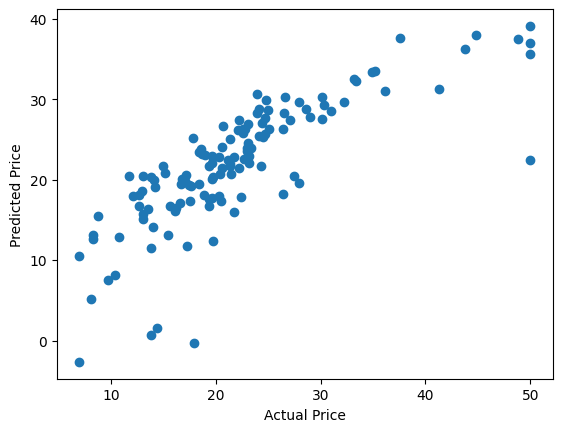

In [23]:
#visualization error
plt.scatter(x=Y_test,y=price_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [24]:
#find the Mean squared error MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test, price_pred)
print(MSE)

30.592662694483906
